## Observations and Insights 

In [286]:
print("Capomulin was used the most versus the other drug regimens to treat tumor growth.")
print("Capomulin treatment for mouse i738 showed effectiveness of the drug.")
print("There were slighlty more male than female patients in the study.")

Capomulin was used the most versus the other drug regimens to treat tumor growth.
Capomulin treatment for mouse i738 showed effectiveness of the drug.
There were slighlty more male than female patients in the study.


In [287]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [288]:
# Checking the number of mice.
mice_count = len(study_data["Mouse ID"].value_counts())
mice_count

249

In [289]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#df = df[not df.duplicated(subset=['val1','val2'], keep=True)]
study_data[study_data.duplicated(subset=["Timepoint", "Mouse ID"], keep="first")]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [290]:
# Optional: Get all the data for the duplicate mouse ID. 
study_data[study_data["Mouse ID"]=="g989"].head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [291]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 
clean_data = study_data[study_data["Mouse ID"] != "g989"] 

In [292]:
# Checking the number of mice in the clean DataFrame.
new_data = len(clean_data["Mouse ID"].value_counts())
new_data

248

## Summary Statistics

In [293]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean.head()


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [294]:
#Median
median = study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median.head()

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Name: Tumor Volume (mm3), dtype: float64

In [295]:
#Variance
variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance.head()

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Name: Tumor Volume (mm3), dtype: float64

In [296]:
#Standard Deviation
standard_deviation = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standard_deviation.head()

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Name: Tumor Volume (mm3), dtype: float64

In [297]:
#SEM
standard_error_mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [298]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_deviation,
    "SEM": standard_error_mean
})
# This method produces everything in a single groupby function
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.854632,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

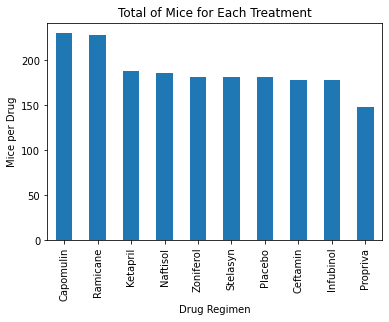

In [299]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

df=clean_data["Drug Regimen"].value_counts()
df.plot(kind="bar")
plt.ylabel("Mice per Drug")
plt.xlabel("Drug Regimen")
plt.title("Total of Mice for Each Treatment")
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

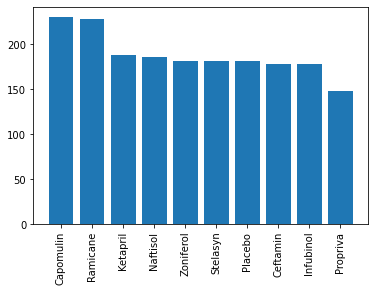

In [300]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
df_pyplot = clean_data["Drug Regimen"].value_counts()
x_values= df_pyplot.index 
y_values = df_pyplot
plt.bar(x_values, y_values)
plt.xticks(rotation=90)

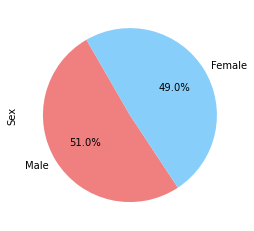

In [301]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data["Sex"].value_counts()
colors = ["lightcoral", "lightskyblue"] 
gender.plot(kind="pie", autopct='%1.1f%%', colors=colors, startangle=120)
plt.axis = ("equal")

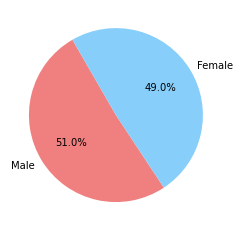

In [302]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_pyplot = clean_data["Sex"].value_counts()

x_values= df_pyplot.index 
y_values = df_pyplot

colors = ["lightcoral", "lightskyblue"]
plt.pie(y_values, labels=x_values, autopct='%1.1f%%', colors=colors, startangle=120)
plt.axis = ("equal")

## Quartiles, Outliers and Boxplots

In [303]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = clean_data.groupby(["Mouse ID"]).max()
final_tumor = final_tumor.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_data = final_tumor[["Mouse ID","Timepoint"]].merge(clean_data,on=["Mouse ID","Timepoint"],how="left")

capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = combined_data.loc[combined_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = combined_data.loc[combined_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]




In [304]:
# Calculate the IQR and quantitatively determine if the are any potencial outliers
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")


lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


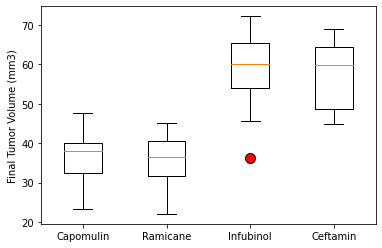

In [305]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_circle = dict(markerfacecolor='red',markersize=10)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=red_circle)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [306]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = clean_data.loc[clean_data["Mouse ID"] == "i738"]
capomulin_mouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
195,i738,Capomulin,Female,23,20,0,45.000000,0
196,i738,Capomulin,Female,23,20,5,45.595685,0
197,i738,Capomulin,Female,23,20,10,43.421014,0
198,i738,Capomulin,Female,23,20,15,37.978778,0
199,i738,Capomulin,Female,23,20,20,38.531136,0


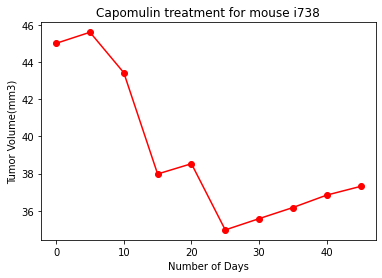

In [307]:
# Line Plot for Capomulin 
x_values = capomulin_mouse["Timepoint"]
y_values = capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(x_values, y_values, marker="o", color="red")
plt.xlabel("Number of Days")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Capomulin treatment for mouse i738")

plt.show()


Text(0, 0.5, 'Avg. Tumor Volume')

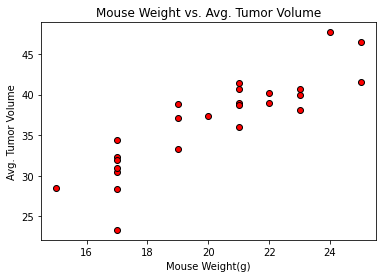

In [308]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mice = combined_data[(combined_data["Drug Regimen"] == "Capomulin")]
avg_tumor_volume = capomulin_mice.groupby(["Mouse ID"]).mean()

plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"], facecolors="red", edgecolors="black")
plt.title("Mouse Weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Avg. Tumor Volume")

In [309]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])[0],2)

print(f"The correlation between mouse weight and average tumor volume is {correlation}")


The correlation between mouse weight and average tumor volume is 0.88


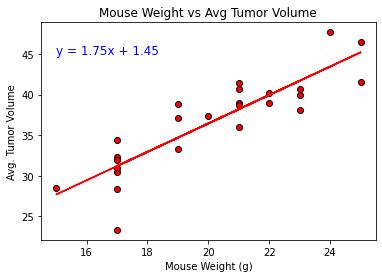

In [310]:
# Linear regression
x_values = avg_tumor_volume["Weight (g)"]
y_values = avg_tumor_volume["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, facecolors="red", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=12,color="blue")
             
plt.title("Mouse Weight vs Avg Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg. Tumor Volume")
plt.show()